In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Data

In [2]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df = spark.read.format("jdbc").options(
    url="jdbc:mysql://localhost:3306/pyspark",
    driver = "com.mysql.jdbc.Driver",
    dbtable = "mytable",
    user="root",
    password="Gr8stofa11time").load()

df.show()

+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  

In [3]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)



In [4]:
pd.DataFrame(df.take(5),columns = df.columns)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### Checking if the data is balanced

In [5]:
df.groupby('deposit').count().toPandas()

,deposit,count
0,no,5873
1,yes,5289


In [6]:
yes_df = df.filter(df.deposit == 'yes')
no_df = df.filter(df.deposit == 'no')

In [7]:
df.filter(df.deposit == 'yes').show()

+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
|age|        job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|deposit|
+---+-----------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+
| 59|     admin.| married|secondary|     no|   2343|    yes|  no|unknown|  5|  may|    1042|       1|   -1|       0| unknown|    yes|
| 56|     admin.| married|secondary|     no|     45|     no|  no|unknown|  5|  may|    1467|       1|   -1|       0| unknown|    yes|
| 41| technician| married|secondary|     no|   1270|    yes|  no|unknown|  5|  may|    1389|       1|   -1|       0| unknown|    yes|
| 55|   services| married|secondary|     no|   2476|    yes|  no|unknown|  5|  may|     579|       1|   -1|       0| unknown|    yes|
| 54|     admin.| married| tertiary|     no|    184|     no|  

### Exploratory Data Analysis

In [8]:
numeric_columns = [t[0] for t in df.dtypes if t[1] == 'int']

In [9]:
categorical_columns = [t[0] for t in df.dtypes if t[1] == 'string']

In [10]:
numeric_df = df.select(numeric_columns).toPandas()
# df.toPandas()

In [12]:
categorical_df = df.select(categorical_columns).toPandas()

In [11]:
numeric_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<AxesSubplot:>

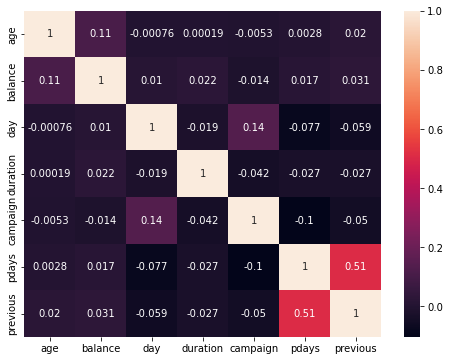

In [13]:
plt.figure(figsize = (8,6))
sns.heatmap(numeric_df.corr(),annot = True)

- There is no significant inter correlation among the variables, other than pdays and previous.
- That is expected, as it is mentioned that pdays = -1 means that the customer have not been contaced yet and previous will be 0.

In [14]:
def analyzeContinuous(col,title,df = numeric_df):
  plt.figure(figsize = (8,6))
  mean = np.round(df[col].mean(),3)
  median = np.round(df[col].median(),3)
  mode = df[col].mode()[0]

  sns.distplot(df[col])
  plt.axvline(mean,color = '#ba2d52',label = "Mean: " + str(mean))
  plt.axvline(median,color = '#d052d9',label = "Medain: " + str(median))
  plt.axvline(mode,color = '#8cf59a',label = "Mode: " + str(mode))
  plt.title(title)
  plt.legend()

*The Function above is used for creating plots for continuous values. The function can be called with any continuous value present in the data, to get its distribution plots.*

C:\Users\Legion\miniconda3\envs\spark\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


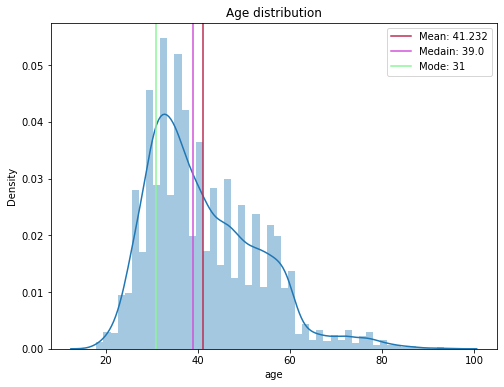

In [15]:
analyzeContinuous("age","Age distribution")

Age is Skewed to the right. The mean and median age are close but mode is low. People the age of 20 and above are contacted. People at the age 32 are contacted more frequently. People above the age of 60 is not contacted as frequent as other young customers.

In [ ]:
analyzeContinuous("balance","Account Balance distribution")

Balance is highly right skewed. The mean balance is 1528. There are few people with high balance amount, this is why the right tail goes around 80000 and few people are having negative balance. Most people have 0 balance.

In [1]:
analyzeContinuous("duration","Duration distribution")

NameError: name 'analyzeContinuous' is not defined

Most call durations are 97 seconds. Suggesting most people end the call within the first 2 minutes of the campaign. The average time a customer is engaged is 6 minutes.

In [ ]:
print(f" New Customers contaced : {sum(numeric_df['pdays'] == -1)}")
print(f" New Customers percentage : {np.round(sum(numeric_df['pdays'] == -1)/numeric_df.shape[0] * 100,3)} %")

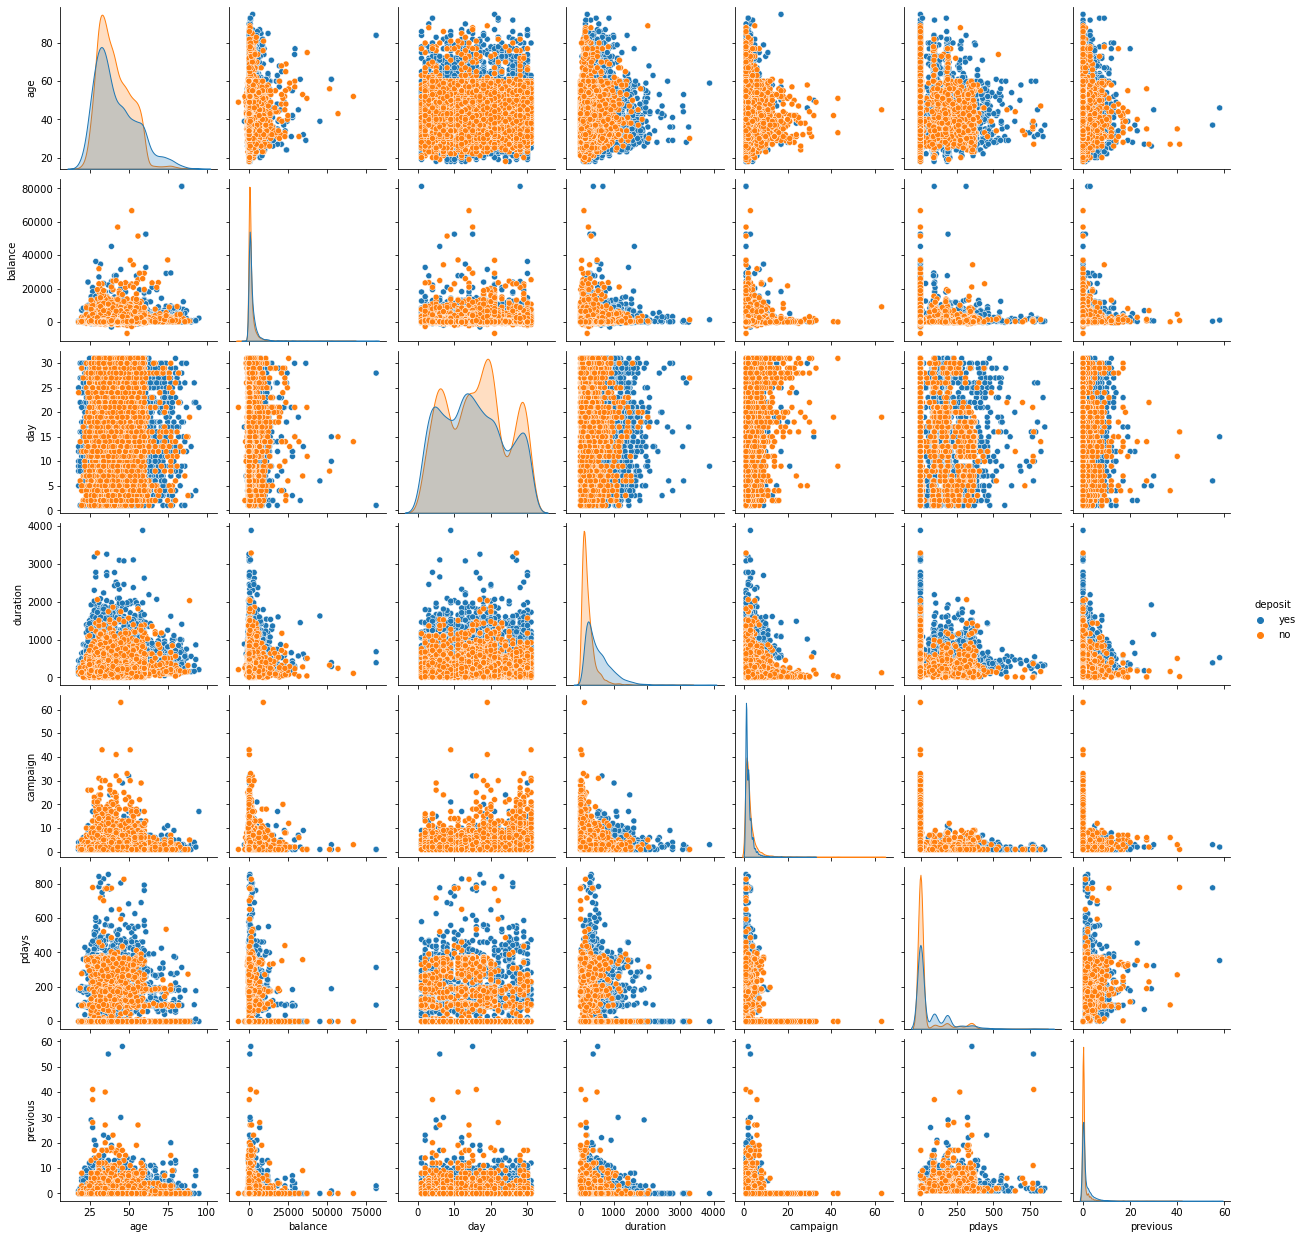

In [19]:
sns.pairplot(df.toPandas(),hue = "deposit")

- Most of the plots in pair plot are overlapping. 
- That is both yes and no response have similar distribution among continuous variables.
- Few Yes classes have higher values in some of the pairs.
- It is difficult to draw inferences from this pair plot

*Since loan is one of the key factors, lets see how it affects the deposit.*

---



In [16]:
def analyzeCategorical(col,title = "",df = categorical_df):
  plt.figure(figsize = (8,6))
  sns.countplot(x = col,hue = "deposit",data = df)
  plt.xticks(rotation = 45)
  plt.title(title)

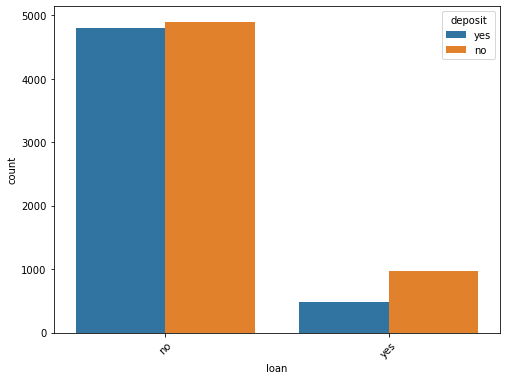

In [18]:
analyzeCategorical("loan")

Customers with personal loan tends to reject the deposit more. 

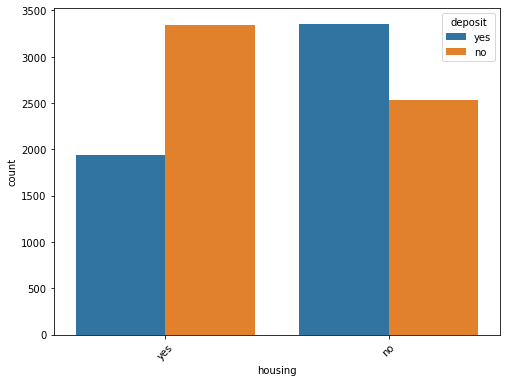

In [19]:
analyzeCategorical("housing")

The same is the case with Housing loan. People with housing loan tends to reject the deposit.

In [20]:
new_cust = numeric_df["pdays"] == -1
new_cust = new_cust.map({True:1,False:0})
categorical_df["new_cust"] = new_cust

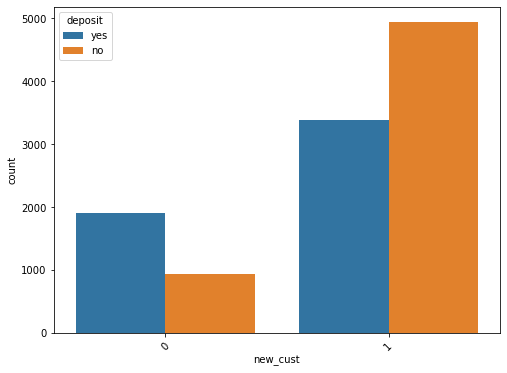

In [21]:
analyzeCategorical("new_cust")

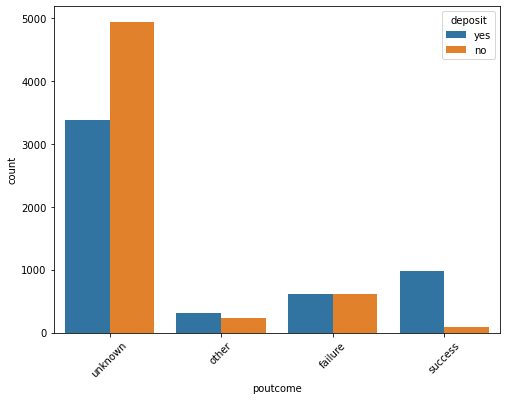

In [22]:
analyzeCategorical("poutcome")

New customers are more rejecting. Customers who where previously contacted seems to again accept the deposit. Also people who deposited during the last contact tends to again deposit for the term.

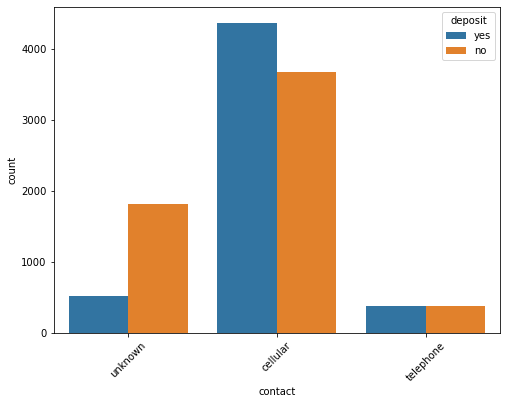

In [23]:
analyzeCategorical("contact")

Customers who were contacted via cellular are more accepting.

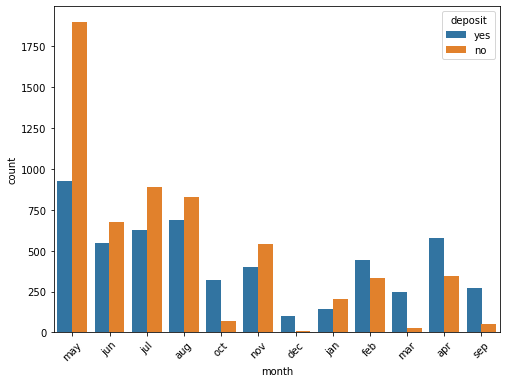

In [24]:
analyzeCategorical("month")

People accept the term deposit more in the months of February, March, April, September, October, and December

In [25]:
age_cat = pd.cut(numeric_df["age"],bins = [17,30,55,80,np.inf],labels = ["18-30","30-55","55-80",">80"])
categorical_df["age_cat"] = age_cat

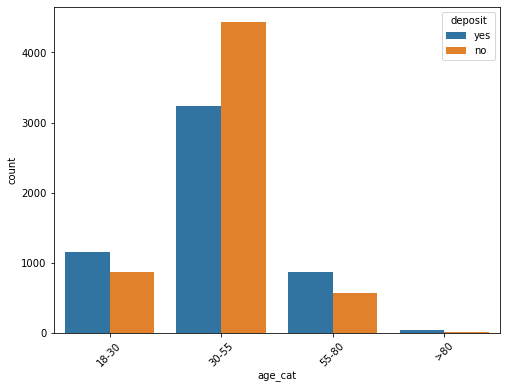

In [26]:
analyzeCategorical("age_cat")

Most people in their middle age are rejecting deposit. Young people and old(retired) people are more accepting the deposit.

### Preprocessing

In [27]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [28]:
# Removing Target Column
categorical_columns.remove('deposit')

In [29]:
stages = []
for cat_col in categorical_columns:
  stringIndexer = StringIndexer(inputCol = cat_col,outputCol = cat_col + "Index")
  encoder = OneHotEncoder(inputCol = stringIndexer.getOutputCol(),outputCol = cat_col + "classVec")
  stages += [stringIndexer,encoder]

label_idx = StringIndexer(inputCol = "deposit",outputCol = "label")
stages += [label_idx]

In [30]:
assemblerInputs = [c + "classVec" for c in categorical_columns] + numeric_columns
assembler = VectorAssembler(inputCols = assemblerInputs, outputCol = "features")
stages += [assembler]

Here we have indexed each categorical column using the StringIndexer, then converted the indexed categories into one-hot encoded variables. We use the StringIndexer again to encode our labels to label indices. The resulting output has the binary vectors appended to the end of each row. We then use the VectorAssembler to combine all the feature columns into a single vector column. This vector column is used for training and prediction process

### Pipelining

Pipelining the stages to specify the ML workflow

In [31]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)

In [32]:
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)

In [33]:
df = df.select(['label','features'] + categorical_columns + numeric_columns)

### LogisticRegression Model

In [34]:
train, test = df.randomSplit([0.7, 0.3], seed = 255)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7829
Test Dataset Count: 3333


In [35]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

C:\Users\Legion\miniconda3\envs\spark\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


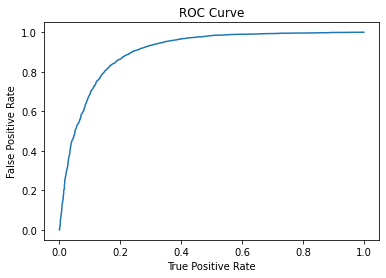

Training set areaUnderROC: 0.903623753467109


In [36]:
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [37]:
predictions = lrModel.transform(test)
predictions.select('label', 'prediction').show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



In [38]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9051773856966862


### RandomForest Classifier

In [39]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)

C:\Users\Legion\miniconda3\envs\spark\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


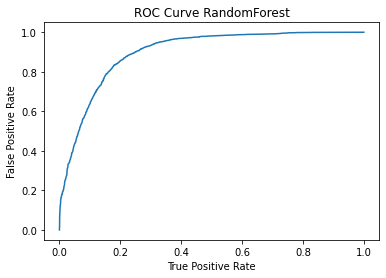

Training set areaUnderROC: 0.8978873557473745


In [40]:
trainingSummary = rfModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve RandomForest')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [41]:
predictions = rfModel.transform(test)
predictions.select('label', 'prediction').show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



In [42]:
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8947056420265751


- The Models perofrm well, Logistic Regression performs better than RandomForest. 
- The AUC tells the ability of the algorithms to distinguish between the two classes. 
- Both model have good AUC and can well distinguish between the classes.

# Conclusion:

Both RandomForest and Logistic regression has similar results. They have similar accuracies and ROC curves. The Decision rules were formed in accord with the EDA performed. 

To have an successful campaign:

- The target audience must be young age and elderly(retired) people.
- Their previous Outcome to be positive.
- The Customer must be engaged for atleast 6 minutes.

In [43]:
test.show()

+-----+--------------------+----------+-------+---------+-------+-------+----+---------+-----+--------+---+-------+---+--------+--------+-----+--------+
|label|            features|       job|marital|education|default|housing|loan|  contact|month|poutcome|age|balance|day|duration|campaign|pdays|previous|
+-----+--------------------+----------+-------+---------+-------+-------+----+---------+-----+--------+---+-------+---+--------+--------+-----+--------+
|  0.0|(42,[0,11,13,16,1...|management|married|secondary|     no|     no|  no| cellular|  aug| unknown| 33|    333| 28|      80|       6|   -1|       0|
|  0.0|(42,[0,11,13,16,1...|management|married|secondary|     no|     no|  no| cellular|  aug| unknown| 42|    580| 22|      67|       2|   -1|       0|
|  0.0|(42,[0,11,13,16,1...|management|married|secondary|     no|     no|  no| cellular|  aug| unknown| 61|    967| 20|     180|       1|   -1|       0|
|  0.0|(42,[0,11,13,16,1...|management|married|secondary|     no|     no|  no| cel

In [44]:
pred_df = predictions.toPandas()

In [45]:
pred_df.head(3)

,label,features,job,marital,education,default,housing,loan,contact,month,...,age,balance,day,duration,campaign,pdays,previous,rawPrediction,probability,prediction
0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",management,married,secondary,no,no,no,cellular,aug,...,33,333,28,80,6,-1,0,"[14.104163494616635, 5.895836505383365]","[0.7052081747308317, 0.29479182526916825]",0.0
1,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",management,married,secondary,no,no,no,cellular,aug,...,42,580,22,67,2,-1,0,"[14.104163494616635, 5.895836505383365]","[0.7052081747308317, 0.29479182526916825]",0.0
2,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",management,married,secondary,no,no,no,cellular,aug,...,61,967,20,180,1,-1,0,"[12.465761913826633, 7.534238086173365]","[0.6232880956913317, 0.3767119043086683]",0.0


In [46]:
yes_df = yes_df.toPandas()

In [47]:
pred_no = pred_df[pred_df['prediction'] == 0.0]

In [48]:
needed_cols = list(yes_df.columns)
needed_cols.remove('deposit')

In [49]:
pred_no = pred_no[needed_cols]

In [50]:
pred_no.drop(['day'],axis = 1,inplace = True)

In [51]:
yes_df.drop(['day','deposit'],axis = 1,inplace = True)

In [52]:
pred_no

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,33,management,married,secondary,no,333,no,no,cellular,aug,80,6,-1,0,unknown
1,42,management,married,secondary,no,580,no,no,cellular,aug,67,2,-1,0,unknown
2,61,management,married,secondary,no,967,no,no,cellular,aug,180,1,-1,0,unknown
3,32,management,married,secondary,no,0,no,no,cellular,aug,162,4,-1,0,unknown
4,54,management,married,secondary,no,1660,no,no,cellular,nov,337,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,39,housemaid,married,secondary,no,1444,no,no,telephone,jul,362,8,-1,0,unknown
3299,54,housemaid,married,secondary,no,962,yes,no,cellular,oct,288,3,-1,0,unknown
3311,62,housemaid,married,unknown,no,2021,no,no,telephone,feb,361,1,-1,0,unknown
3312,64,housemaid,married,unknown,no,2645,no,no,telephone,feb,219,2,-1,0,unknown


In [53]:
yes_df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,retired,divorced,primary,no,1389,no,no,cellular,apr,335,1,-1,0,unknown
5285,30,management,single,tertiary,no,398,no,no,cellular,oct,102,1,180,3,success
5286,69,retired,divorced,tertiary,no,247,no,no,cellular,apr,138,2,-1,0,unknown
5287,48,entrepreneur,married,secondary,no,0,no,yes,cellular,jul,431,2,-1,0,unknown


In [54]:
findMonth = spark.createDataFrame(pred_no)

In [55]:
trainMonth = spark.createDataFrame(yes_df)

In [56]:
categorical_columns = [t[0] for t in trainMonth.dtypes if t[1] == 'string']

In [57]:
stages = []
for cat_col in categorical_columns:
  stringIndexer = StringIndexer(inputCol = cat_col,outputCol = cat_col + "Index")
  encoder = OneHotEncoder(inputCol = stringIndexer.getOutputCol(),outputCol = cat_col + "classVec")
  stages += [stringIndexer,encoder]

label_idx = StringIndexer(inputCol = "month",outputCol = "label")
stages += [label_idx]

In [58]:
numeric_columns = [t[0] for t in trainMonth.dtypes if t[1] != 'string']

In [59]:
assemblerInputs = [c + "classVec" for c in categorical_columns] + numeric_columns
assembler = VectorAssembler(inputCols = assemblerInputs, outputCol = "features")
stages += [assembler]

In [ ]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(trainMonth)
trainMonth = pipelineModel.transform(trainMonth)
findMonth = pipelineModel.transform(findMonth)

In [75]:
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(trainMonth)

IllegalArgumentException: 'Field "features" does not exist.\nAvailable fields: age, job, marital, education, default, balance, housing, loan, contact, month, duration, campaign, pdays, previous, poutcome'

In [ ]:
predictions = rfModel.transform(test)

In [ ]:
predicted_months = predictions.select('prediction').toPandas()

In [ ]:
predicted_months

,prediction
0,1.0
1,1.0
2,1.0
3,1.0
4,4.0
...,...
3328,5.0
3329,0.0
3330,1.0
3331,9.0
